

# Project: Investigate NoShowAppointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### NoShowAppointments is a dataset has records of patients, it has 14 columns:

    [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show], 

It is most concerned with No-show attribute. For more info., Check <a href=https://www.kaggle.com/joniarroba/noshowappointments>this.
    
  

###### I would analyse the dataset by applying conditinal probabiity and visualizations.

#### Questios to be answered formed to analyse the dataset :
    Question 1: Is there a relation between having diabetes and not showing in appointment?
    Question 2: Is there a relation between no show and the SMS_received?
    Question 3: Is there a relation between no-show and the neighburhood?
    Question 4: Is there a relation between having diabetes and age?
        

#### First, I import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sb
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
data = pd.read_csv('NSA.csv')

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.shape
# the dataframe has 110527 rows and 14 columns

(110527, 14)

In [5]:

data.info()
# the output shows that there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
data.describe()
# the data needs to be modified, for example, the min age is -1, and this is not right as there is no negative age

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


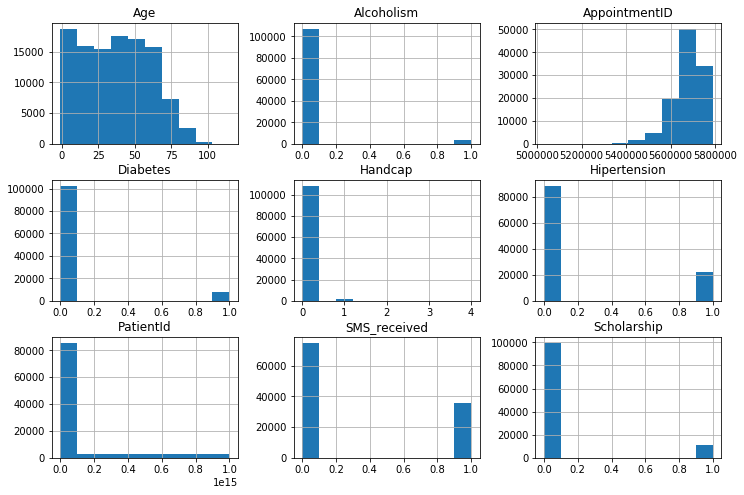

In [7]:
data.hist(figsize=(12,8));

#### Notice that:
    Many attributes are boolean(have values 0,1 only): [Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received]
    The age histogram is right skewed, so the records are baised to young people, and not somehow represenative.

In [8]:
data.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


#### It is obvious that the correlation between the attributes is very low.



### Data Cleaning (Replace this with more specific notes!)

#### First, we clear the data from records when the age is less than 0

In [9]:
data=data[data['Age']>=0]

#### We check outliers

Text(0,0.5,'values')

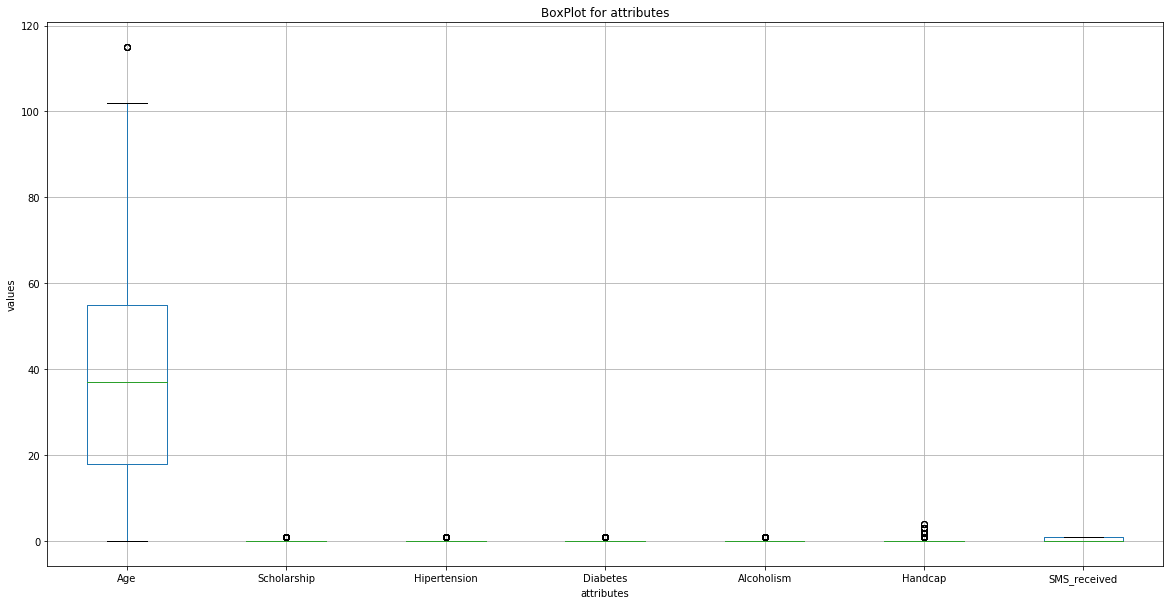

In [10]:

data.boxplot(column =[ 'Age',  'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'],figsize=(20,10))
mpl.pyplot.title( "BoxPlot for attributes" )
mpl.pyplot.xlabel('attributes')
mpl.pyplot.ylabel('values')




#### It is obvious that there are outliers so i will clear the records which have outlier numerical attributes.

#### We clear the outliers of : age , Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received

In [11]:
Q1 = data.iloc[:,np.r_[5,7:9,10:13]].quantile(0.25)
Q3 = data.iloc[:,np.r_[5,7:9,10:13]].quantile(0.75)
IQR = Q3 - Q1
data.iloc[:,np.r_[5,7:9,10:13]] =data[(data.iloc[:,np.r_[5,7:9,10:13]] < (Q1 - 1.5 * IQR)) |(data.iloc[:,np.r_[5,7:9,10:13]] > (Q3 + 1.5 * IQR)
                                                                                  )==False]

#### We drop null values that appeared after dropping outliers.

In [12]:
data.dropna(inplace =True)

#### We check the dataset after cleaning

In [13]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.693300e+04,7.693300e+04,76933.000000,76933.0,76933.0,76933.000000,76933.0,76933.0,76933.000000
mean,1.482474e+14,5.673638e+06,31.397294,0.0,0.0,0.015845,0.0,0.0,0.325426
std,2.566070e+14,7.155886e+04,21.682922,0.0,0.0,0.124876,0.0,0.0,0.468537
min,3.921784e+04,5.030230e+06,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,4.169967e+12,5.638570e+06,13.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,3.172848e+13,5.679363e+06,30.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
75%,9.476997e+13,5.724140e+06,48.000000,0.0,0.0,0.000000,0.0,0.0,1.000000
max,9.999816e+14,5.790484e+06,102.000000,0.0,0.0,1.000000,0.0,0.0,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76933 entries, 1 to 110526
Data columns (total 14 columns):
PatientId         76933 non-null float64
AppointmentID     76933 non-null int64
Gender            76933 non-null object
ScheduledDay      76933 non-null object
AppointmentDay    76933 non-null object
Age               76933 non-null float64
Neighbourhood     76933 non-null object
Scholarship       76933 non-null float64
Hipertension      76933 non-null float64
Diabetes          76933 non-null int64
Alcoholism        76933 non-null float64
Handcap           76933 non-null float64
SMS_received      76933 non-null int64
No-show           76933 non-null object
dtypes: float64(6), int64(3), object(5)
memory usage: 8.8+ MB


<a id='eda'></a>
## Research Questions:

### Research Question 1:  Is there a relation between having diabetes and not showing in appointment?

#### First, we compute some conditional probabilities between diabetes and no show.

In [15]:
noShow= data[data['No-show']=='No']
show= data[data['No-show']=='Yes']
diab = data[data['Diabetes']==True]

print('P(diabetes|no show)= ',len(noShow[noShow['Diabetes']==True])/len(noShow))
print('P(diabetes|show)= ',len(show[show['Diabetes']==True])/len(show))
print('P(no show|diabetes)= ',len(diab[diab['No-show']=='No'])/len(diab))
print('P(show|diabetes)= ',len(diab[diab['No-show']=='Yes'])/len(diab))
print('P(no diabetes|noshow)= ',len(noShow[noShow['Diabetes']==False])/len(noShow))
print('P(no diabetes|show)= ',len(show[show['Diabetes']==True])/len(show))

P(diabetes|no show)=  0.016
P(diabetes|show)=  0.015245445344129555
P(no show|diabetes)=  0.8022969647251845
P(show|diabetes)=  0.19770303527481542
P(no diabetes|noshow)=  0.984
P(no diabetes|show)=  0.015245445344129555


#### We bar plot some important probabilities 

Text(0.5,1,'Conditional Probabilities for show/no show and diabetes/no-diabetes')

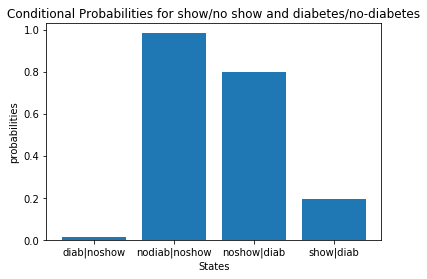

In [16]:
mpl.pyplot.bar(["noshow|diab","show|diab","diab|noshow","nodiab|noshow"], [0.802,0.197,0.016,0.984] )
mpl.pyplot.xlabel('States')
mpl.pyplot.ylabel('probabilities')
mpl.pyplot.title('Conditional Probabilities for show/no show and diabetes/no-diabetes')

#### We can conclude that: 
    People who do not have diabetes are about 92.6 % of people who do not show in appointment. 
    If a patient have diabetes then he will not show in appointment by probability 81.9%. 
    We can not consider that there is a positive relation between having diabetes and not showing in appoinment, because the probability to not showing in appointment is very high for both having or not having diabetes.

### Question 2: Is there a relation between no show and the SMS_received?

#### We visualize the mean value of SMS recieved from both, no shw and show patients.

Text(0.5,1,'SMS Recieved For show and no-show')

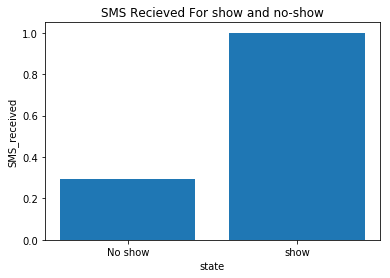

In [17]:
mpl.pyplot.bar(['No show','show'],[sum(noShow['SMS_received'])/len(noShow['SMS_received']),sum(show['SMS_received'])/sum(show['SMS_received'])])
mpl.pyplot.xlabel('state')
mpl.pyplot.ylabel('SMS_received')
mpl.pyplot.title('SMS Recieved For show and no-show')

#### We can conclude that:
    There is a negative relation between number of SMS recieved and no show, so  the number of show increaes when recieved SMS increases.

### Question 3: Is there a relation between no-show and the neighburhood?

In [18]:
noShow['Neighbourhood'].value_counts()  

JARDIM CAMBURI         5724
MARIA ORTIZ            4401
RESISTÊNCIA            2455
JARDIM DA PENHA        2354
CENTRO                 1892
JABOUR                 1780
ITARARÉ                1735
SANTO ANTÔNIO          1549
JESUS DE NAZARETH      1539
TABUAZEIRO             1533
SANTA MARTHA           1486
ILHA DE SANTA MARIA    1466
SANTO ANDRÉ            1364
BONFIM                 1342
CARATOÍRA              1152
ROMÃO                  1145
NOVA PALESTINA         1108
FORTE SÃO JOÃO         1097
SÃO PEDRO              1091
ANDORINHAS             1044
DA PENHA               1024
SÃO JOSÉ                989
MARUÍPE                 942
ILHA DO PRÍNCIPE        939
GURIGICA                933
SÃO CRISTÓVÃO           871
REDENÇÃO                870
BELA VISTA              856
CRUZAMENTO              728
JOANA D´ARC             722
                       ... 
FONTE GRANDE            295
DO CABRAL               293
SANTA LUÍZA             282
BARRO VERMELHO          282
SANTA LÚCIA         

Text(0.5,1,'Neigbourhood histogram for patients did not show')

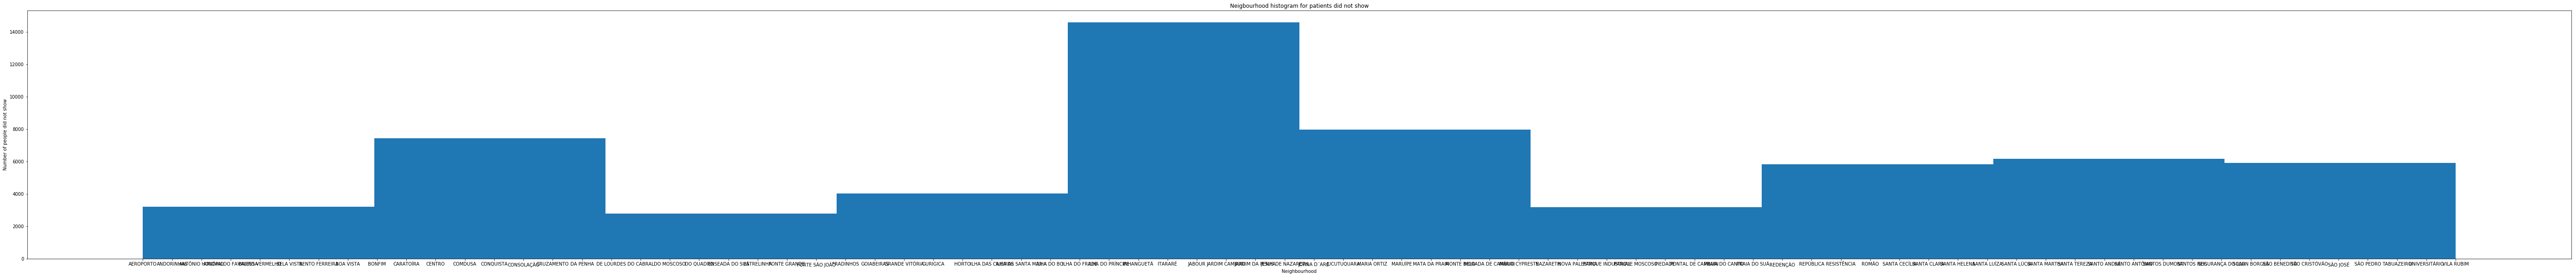

In [19]:
f1, a0 = mpl.pyplot.subplots(figsize=(100, 10))
a0.hist(noShow['Neighbourhood'],histtype='bar',)
a0.set_xlabel('Neighbourhood')
a0.set_ylabel('Number of people did not show')
a0.set_title('Neigbourhood histogram for patients did not show')

#### We an conclude that:
    Yes, There is a relation between no-show and the neighburhood, because the number of no show patients is very high for specific neighbourhoods, and low for others.

### Research Question 4: Is there a relation between having diabetes and age?

#### First, we  plot (scatter plot) the relation between age and diabetes feature.

Text(0.5,1,'Relation between age and diabetes')

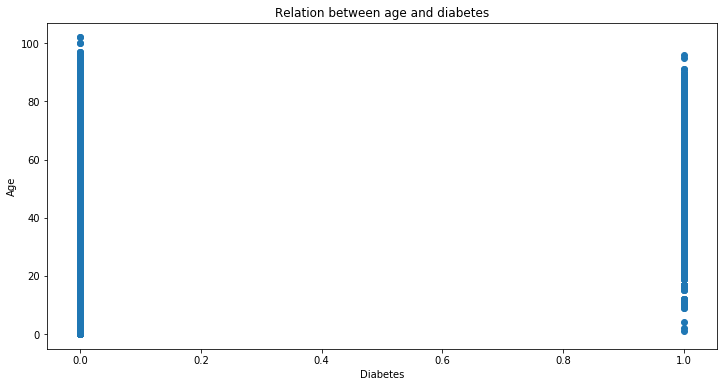

In [20]:
f2, a1 = mpl.pyplot.subplots(figsize=(12,6))
a1.scatter( data['Diabetes'],data['Age'])
a1.set_xlabel('Diabetes')
a1.set_ylabel('Age')
a1.set_title('Relation between age and diabetes')

#### There is no obioues relation, but I will continue anyway.

#### Then we calculate some conditional probabilities.

In [21]:
peopleLess20 =data[data['Age']<20]
print("P(have diabetes| less than 20 years) = ", len(peopleLess20[peopleLess20['Diabetes']==1.0])/len(peopleLess20))

peopleMore20 =data[data['Age']>=20]
print("P(have diabetes| more than or = 20 years) = ", len(peopleMore20[peopleMore20['Diabetes']==1.0])/len(peopleMore20))

peopleMore100 =data[data['Age']>=100]
print("P(have diabetes| more than or = 100 years) = ", len(peopleMore100[peopleMore100['Diabetes']==1.0])/len(peopleMore100))

peopleMore90 =data[data['Age']>=90]
print("P(have diabetes| more than or = 90 years) = ", len(peopleMore90[peopleMore90['Diabetes']==1.0])/len(peopleMore90))


peopleMore50 =data[data['Age']>=50]
print("P(have diabetes| more than or = 50 years) = ", len(peopleMore50[peopleMore50['Diabetes']==1.0])/len(peopleMore50))
peopleLess50 =data[data['Age']<50]
print("P(have diabetes| less than  50 years) = ", len(peopleLess50[peopleLess50['Diabetes']==1.0])/len(peopleLess50))

peopleMore60 =data[data['Age']>=60]
print("P(have diabetes| more than or = 60 years) = ", len(peopleMore60[peopleMore60['Diabetes']==1.0])/len(peopleMore60))
peopleLess60 =data[data['Age']<60]
print("P(have diabetes| less than  60 years) = ", len(peopleLess60[peopleLess60['Diabetes']==1.0])/len(peopleLess60))

P(have diabetes| less than 20 years) =  0.0017588503854501908
P(have diabetes| more than or = 20 years) =  0.02334149887474856
P(have diabetes| more than or = 100 years) =  0.0
P(have diabetes| more than or = 90 years) =  0.03731343283582089
P(have diabetes| more than or = 50 years) =  0.04423696787818161
P(have diabetes| less than  50 years) =  0.007176911722289146
P(have diabetes| more than or = 60 years) =  0.05251346499102334
P(have diabetes| less than  60 years) =  0.01104070801664192


#### Then we get the distibution of age for people have diabetes

P(aged above or equal 50|diabetes) =  0.6529942575881871
P(aged less than 50|diabetes) =  0.347005742411813
count    1219.000000
mean       53.376538
std        16.158548
min         1.000000
25%        44.000000
50%        55.000000
75%        64.000000
max        96.000000
Name: Age, dtype: float64


Text(0.5,1,'Age histogram for patients have diabetes')

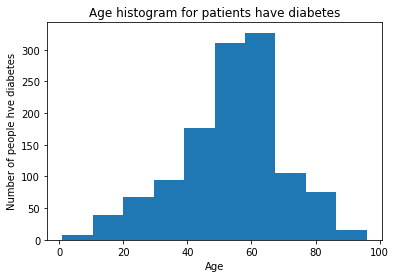

In [22]:
diabetesPeople = data[data['Diabetes']==1.0]
print("P(aged above or equal 50|diabetes) = ",len(diabetesPeople[diabetesPeople['Age']>=50])/len(diabetesPeople) )
print("P(aged less than 50|diabetes) = ",len(diabetesPeople[diabetesPeople['Age']<50])/len(diabetesPeople) )
print(diabetesPeople['Age'].describe())

f3, a3 = mpl.pyplot.subplots()
a3.hist(diabetesPeople['Age'],histtype='bar')
a3.set_xlabel('Age')
a3.set_ylabel('Number of people hve diabetes')
a3.set_title('Age histogram for patients have diabetes')

# a little left skewed =>  then, if the patient aged >61 years, the probability to have diabetes will increase from  0.037 to 0.218

#### Is a little left skewed =>  then, if the patient aged >61 years, the probability to have diabetes will increase from  0.037 to 0.218

#### we can conclude that:
    If people have 50 or above have a greater probability to have diabetes than people less than 50 years, 
    but both probabilities are not large so we can not say that having diabetes is affected much by your age.


## Conclusions


1- Although people who do not have diabetes are about 92.6 % of people who do not show in appointmen, and if a patient have diabetes then he will not show in appointment by probability 81.9%. But, We can not consider that there is a positive relation between having diabetes and not showing in appoinment, because the probability to not showing in appointment is very high for both having or not having diabetes.

2- There is a negative relation between number of SMS recieved and no show, so  the number of show increaes when recieved SMS increases. 

    
3- There is a relation between no-show and the neighburhood, because the number of no show patients is very high for specific neighbourhoods, and low for others.


4- The age histogram is right skewed.

5- There is a very weak relation between having diabetes and age, if people have 50 or above, they have a greater probability to have diabetes than people less than 50 years, but both probabilities are not large so we can not say that having diabetes is affected much by your age.

6- The mean age after clearing outliers is 31 years

7- The mean diabetes value after clearing outliers is 0.015845, so we can say that most patients do not have diabetes. 


## Limitations 

1- The dataset had much outliers.

2- The histogram of Age was right skewed.

3- Most of the conditional probabilities that I calcualted did not show a consistent relationship, so it needs more feature engineering.

4- The correlation between the attributes of the dataset is very low.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])